### Summary

In progress...

### Loading packages and data

In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', 1000)

In [3]:
# Download data from google drive (Respect Eng / Wiki Collab): wikipdia data/v2_annotated
dat = pd.read_csv('../data/exp2_annotated_1k_no_admin_blocked_user_post_sample.csv')

In [4]:
# Remove test questions
dat = dat[dat['_golden'] == False]

In [5]:
# Replace missing data with 'False'
dat = dat.replace(np.nan, False, regex=True)

In [6]:
#Translate the values from 
#how_aggressive_or_friendly_is_the_tone_of_this_comment into numbers
def translate_how_aggressive_to_num(score):
    str_to_num = {'+++ Very Friendly': 3,
                  '++': 2,
                  '+': 1,
                  'Neutral': 0,
                  '-': -1,
                  '--': -2,
                  '--- Very Aggressive (including passive aggression)': -3}
    if score:
        return str_to_num[score]
    else:
        return np.nan

In [7]:
dat['aggression_score'] = dat['how_aggressive_or_friendly_is_the_tone_of_this_comment'].apply(translate_how_aggressive_to_num)

In [8]:
def create_column_of_counts(df, col):
    return df.apply(lambda x: col in str(x))

In [9]:
attack_columns = ['not_attack', 'other', 'quoting', 'recipient', 'third_party']

In [10]:
for col in attack_columns:
    dat[col] = create_column_of_counts(dat['is_harassment_or_attack'], col)

In [11]:
def create_column_of_counts_from_nums(df, col):
    return df.apply(lambda x: int(col) == x)

In [12]:
aggressive_columns = ['-3', '-2', '-1', '0', '1', '2', '3']

In [13]:
for col in aggressive_columns:
    dat[col] = create_column_of_counts_from_nums(dat['aggression_score'], col)

In [14]:
# Group the data
agg_dict = dict.fromkeys(attack_columns, 'mean')
agg_dict.update(dict.fromkeys(aggressive_columns, 'sum'))
agg_dict.update({'clean_diff': 'first', 'na': 'mean', 'aggression_score': 'mean', '_id':'count'})
grouped_dat = dat.groupby(['rev_id'], as_index=False).agg(agg_dict)

In [15]:
# Get rid of data which the majority thinks is not in English or not readable
grouped_dat = grouped_dat[grouped_dat['na'] < 0.5]

### Plot histogram of average ratings by comment

For each revision, we take the average of all the ratings by level of friendliness/aggressiveness. The histogram of these averages is displayed below.

In [16]:
def hist_comments(df, bins, plot_by, title):
    plt.figure()
    sliced_array = df[[plot_by]]
    weights = np.ones_like(sliced_array)/len(sliced_array)
    sliced_array.plot.hist(bins = bins, legend = False, title = title, weights=weights)
    plt.ylabel('Proportion')
    plt.xlabel('Average Score')

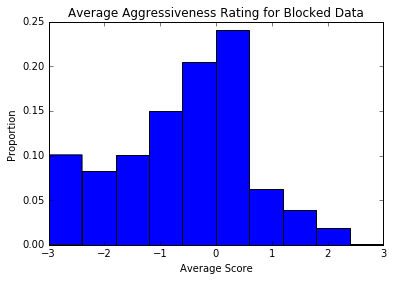

In [17]:
bins = np.linspace(-3,3,11)
hist_comments(grouped_dat, bins, 'aggression_score', 'Average Aggressiveness Rating for Blocked Data')

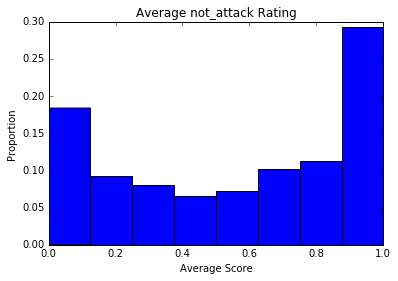

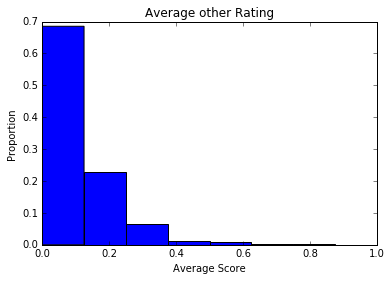

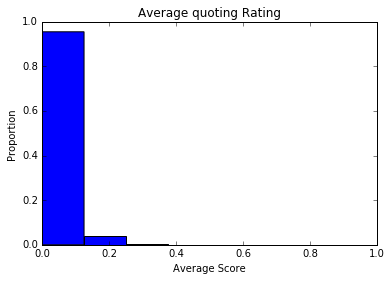

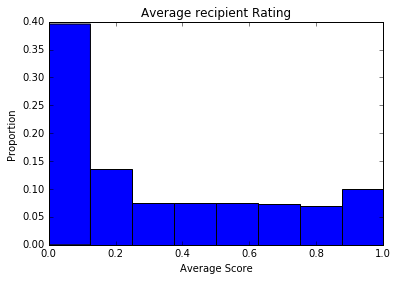

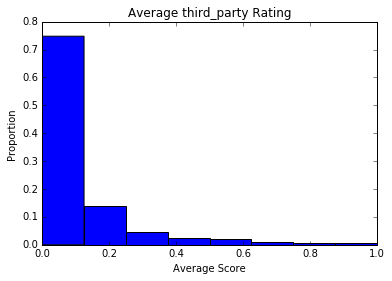

In [18]:
bins = np.linspace(0,1,9)
for col in attack_columns:
    hist_comments(grouped_dat, bins, col, 'Average %s Rating' % col)

### Selected harassing and aggressive comments by quartile

In [19]:
# Need to ensure num < 100. Should add check.
def sorted_comments(df, sort_by, quartile, num, is_ascending = True):
    n = df.shape[0]
    if quartile == 1:
        quartile = 0.99
    start_index = int(quartile*n)
    return df[['clean_diff', 'aggression_score',
              'not_attack', 'other', 'quoting', 'recipient', 'third_party']].sort_values(
        by=sort_by, ascending = is_ascending)[start_index:start_index + num]

Most aggressive comments

In [20]:
sorted_comments(grouped_dat, 'aggression_score', 0, 5)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
492,Fucking left-wing bastard \n\nYou left-wing liberalist bastards are enemies of a free and righteous world and ought to be banned!,-3,0,0.142857,0,1.000000,0.000000
737,Hum! \n\nFuck you! You are a person worse than pigs or dogs!,-3,0,0.000000,0,1.000000,0.000000
520,Renzoy16 ! Shut The Fuck Up,-3,0,0.000000,0,0.857143,0.142857
818,su:)ck my ba:)lls you fa:)g:)got \n\nloser,-3,0,0.142857,0,0.857143,0.000000
681,You fascit Nazi! You socialist bastard! You filthy Hippy! \n\nYou dare touch my edits again and I'll go to where you live and kick your ass in person. It shouldn't be hard to find. Communes smell worse than slaughter houses. I make edits. I don't vandilaze. Get off your high horse.,-3,0,0.000000,0,1.000000,0.000000


Median aggressive comments

In [21]:
sorted_comments(grouped_dat, 'aggression_score', 0.5, 5)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
570,"In that case, I'll revert to the comments I made before I noticed he was blocked. The Dissident Aggressor",-0.428571,0.714286,0.285714,0,0.000000,0.142857
957,"Warning \n\nInstead of warning me, can you look a little closer at what went on?\n\nI spent a consider time improving an article. He and two other authors came about and replaced a 99% EXACT duplicate of content which actuall remained in topic,\n\nAll I had done was paragraphize it.\n\nOf course, I removed it.\n\nYou can see it here under the section 'History' as plain as day.\n\nHe then attacked me claiming I was edit warring. \n\n Where is the sense in that?\n What is the benefit in duplicating content?\n How did it improve the article or encourage involvement?\n\nTherefore I asked him to remove and erase the bad mark so it is not used again me but he refuses, and now runs to you.\n\nDo you think this is correct, or do you think you are just being manipulated?\n\nAgain, I ask you, what is the benefit to the Wikipedia or its readers to have duplicate and badly composed content?\n\nThank you.",-0.428571,0.428571,0.000000,0,0.571429,0.142857
567,The Dissident Aggressor,-0.428571,0.428571,0.142857,0,0.000000,0.428571
117,"""This is because it means reading walls of text and endless discussion. It is tantamount to a strategy and unfair advantage."" - he used exactly that tactic himself; so many times on boards, talkpages, and on the article talkpage; and drowned his own RfC about a merge re his similarly-biased/clueless Indo-Canadian titles. A lot of those ""55,956 words"" were his, all being obstinate and obstructive and working hard to reject sources or facts not to his liking/bias. And that tactic is described in certain passage of WP:POV fork.\n\nthe grossly overpadded Vancouver section that he is now POV forking is full of junk/trivia and off-topic content and UNDUE, he was only adding content IMO to try to justify the split; I've found tons of repetitions, loads of bad writing, abuse of sources and SYNTH and more. And you say ""be concise"" - when there's so much wrong all at once and I try to lay it out and show what's wrong with it, it's ""too long to read"". So, apparently, is the NPOV policy an...",-0.428571,0.571429,0.142857,0,0.142857,0.285714
595,"didn't try to explain his ""refugee crisis"" edit on the talk page after multiple undo's. Only later came up with a source that substantiates nothing. The IP 37.76.11.111 was me (I did not care to log in for a mere undo) but not 37.76.42.195. It's not only me in Hungary interested in AND AFFECTED DIRECTLY by this crisis who think in the same way about it. Furthermore i would like to COMPLAIN ABOUT THE CLEAR BIAS of towards The New York Times bordering on BRAND BUILDING: not cites almost EXCLUSIVELY The NYT, but insist on MENTIONING IT BY NAME in the lead section of the article.",-0.428571,0.714286,0.142857,0,0.142857,0.000000


Least aggressive comments

In [22]:
sorted_comments(grouped_dat, 'aggression_score', 0, 5, False)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
852,"Thank you so much! Many blessings for you, and your family the Christmas season!",2.857143,1,0,0,0,0
39,"Such a friendly, helpful and encouraging person (82.132.222.241 )",2.285714,1,0,0,0,0
340,"Thanks so much for your help and advice! Cheers! 02:31, 28 May 2015 (UTC)",2.285714,1,0,0,0,0
298,"Merci Beaucoup \n\nA very kind thank you, Geraldine.",2.285714,1,0,0,0,0
432,Hello Machan! \n\n My Pleasure It's my pleasure to corporate with you ion your modest work in safeguarding the Sinhalese culture and ethics. Talk to me anytime. Summon,2.142857,1,0,0,0,0


### Work in progress

In [23]:
## Slices on joins

In [24]:
sorted_comments(grouped_dat[grouped_dat['not_attack'] > 0.5], 'aggression_score', 0, 5)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
562,because I'm gay and love to suck cock,-1.500000,0.625000,0.375000,0,0.000000,0.000000
326,"I'M REALLY FUCKING SCARED 86.131.154.229 22:41, 26 May 2015 (UTC)",-1.428571,0.571429,0.285714,0,0.142857,0.000000
489,"Oh, sure! That old chestnut… Ah, and to think I was about to ask if you had that idiom in Yankland—you own it!\nNow, listen up, American worm: I have 614 pages on my watchlist so far. I'd also ask you to keep in mind that I have incredible power.\nAlso, please, do not misunderstand my keeping out that edit on Juan Cole. It honestly was just that Mediaite (sp?) cannot be considered RS, as well you knew. I am not interested in defending that maggot—""Let's invade Libya! It will be totally cool!""—because Cole pronounces himself a person of the Left. If you want to fire reams of criticism into his article, be my guest. Truth told, there is already some embarrassingly precarious synth criticism of him inserted by me. I ought to snip it out, but I just can't find the time, you know?\nContinuing with Cole: I do think the bit about the ""far right-wing Jews"" is just the usual attempt at smear with antisemitism (he's a critic of Israel, as you know). He, of course, knew this would happen, whi...",-1.142857,0.571429,0.142857,0,0.428571,0.000000
541,"=The edit goons are at it again\n\nPresumably no one else here gets ""citation needed"" tags in their user page, since it is a user page, rather than an encyclopedic article, a distinction an overzealous seems to have failed to grasp. I'd love to see an example of another editor who had their personal user page subjected to such pointless scrutiny. You know, so I can continue to ""assume good faith"" rather than conclude than I've been unfairly targeted and treated once again.",-1.142857,0.571429,0.000000,0,0.000000,0.428571
34,"If you leave me a message here, I will ignore it and delete it. I do not care what you have to say.",-1.142857,0.571429,0.000000,0,0.428571,0.000000


In [25]:
sorted_comments(grouped_dat[grouped_dat['quoting'] > 0.3], 'aggression_score', 0, 5)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
714,By the way... \n\nI met Eric Corbett in Manchester yesterday and he called you a twat. Just thought you should know. 195.89.48.217,-1.000000,0.142857,0,0.428571,0.428571,0.000000
713,Guess what... \n\nI met Cassianto yesterday in London and he called you a twat. Just thought you should know. 195.89.48.217,-0.714286,0.142857,0,0.571429,0.142857,0.142857


In [26]:
sorted_comments(grouped_dat[grouped_dat['other'] > 0.5], 'aggression_score', 0, 5)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
746,I will fuck the whole wikipedia!!!,-2.285714,0.000000,0.571429,0.000000,0.285714,0.428571
450,Hi \n\nIm a fucking bitch.\n\n50.180.208.181,-2.000000,0.142857,0.714286,0.000000,0.000000,0.142857
791,"White Latin American \nYou think that I'm stupid, right ?. I already use the discucion of the page White Latin American, and to this day there is still no answers. I know that you and other users have an alliance with the user Bleckter against me, and I will discover, and when I do I will bring to light. I'm watching all.",-2.000000,0.000000,0.571429,0.000000,0.571429,0.142857
48,"and I'm very arrogant, I think my opinion is superior to everyone else's and love to suck dick",-1.857143,0.428571,0.714286,0.000000,0.000000,0.000000
642,"ArbCom draft \n\nDoing this here so people don't think I've been ignoring everything that's going on like the spiteful asshole a lot people seem to think I am. Diffs are in short supply at present for the latter half of the dispute, but will be coming soon.\n\n*\n\nI first encountered Catflap08 on Talk:Kenji Miyazawa. I was reading about an author I like and noticed that the lead described him as a ""nationalist"", despite the cited source not doing so. I removed it and posted a comment explaining my removal on the talk page. At this point I had no idea who had added the epithet, when, or why, and I didn't care. Catflap08 immediately reverted me and replied on the talk page, ignoring my rationale and merely saying that because a source was cited, even though that source didn't verify the claim being made, the claim could not be removed. When I tried discussing on the talk page, he took this content dispute to AN.\n\nAfter he was told that article content disputes should be discussed...",-1.857143,0.142857,0.571429,0.142857,0.285714,0.428571


In [27]:
sorted_comments(grouped_dat[grouped_dat['third_party'] > 0.5], 'aggression_score', 0, 5)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
768,This user enjoys sucking his father's shaft,-2.857143,0,0.000000,0,0.142857,1.000000
591,Ronald McDonald is gay and he has a fart fetish \n\nRonald McDonald is going to rape you in the ass with his massive penis and then he is going to fart on your face because he is gay 219.127.83.147,-2.714286,0,0.000000,0,0.714286,0.571429
385,"The Graceful Slick....\nIs non other than an ungraceful dick!81.153.48.177 23:19, 30 May 2015 (UTC)",-2.571429,0,0.142857,0,0.428571,0.571429
370,"The Graceful Slick....\nIs non other than an ungraceful dick!81.131.78.39 22:55, 30 May 2015 (UTC)",-2.571429,0,0.285714,0,0.285714,0.571429
311,Verdy_p is a brainless mongoloid with an arrogance stick up his rear end.,-2.571429,0,0.000000,0,0.285714,0.857143


In [28]:
sorted_comments(grouped_dat[grouped_dat['not_attack'] < 0.5], 'aggression_score', 0, 5, False)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
767,"Suspected sockpuppetry \n\nI say, do you think that there is some bizarre, yet subtle sockpuppetry going on over there, right at the bottom ?! More likely closer to you than to me, if you get my gist! Anyway, thank you! Ta-ra!",0.142857,0.428571,0.000000,0,0.428571,0.142857
310,"You need to say sorry to all the fellow Wikipedians you offended! 207.62.246.166 22:13, 9 May 2015 (UTC)",-0.142857,0.428571,0.000000,0,0.571429,0.000000
941,"I am sorry Jim but we are not done until the issue is resolved. \n\n Already your bogus and erroneous accusation has caused me problems, wasted energy and bad will on other topic. You've been around here long enough to know how the system works.\n\n In each of the edits your refer to, the content being replaced by others including yourself was a 99% duplication of what was already and immediately above it. If anyone you should have been accusing the others.\n\n So, my position is the same. Apologise for wasting my time and creating this conflict, and erase your bogus and erroneous accusation from my page.\n\n Thank you.",-0.285714,0.428571,0.142857,0,0.428571,0.000000
10,"Gourmet\nYou call it vandalism, I call it a first draft toward a more truthful description of \nwhy the magazine was closed. Certainly accepting the claim of Conde Nast as 'truth' is\nanti-NPOV.\n\nIgnoring what is a vital fact, the details of how the magazine was destroyed by hacks, is\nfar from NPOV. Please do not revert edits with spurious claims of vandalism.\n",-0.285714,0.428571,0.000000,0,0.571429,0.000000
155,"Mindless behavior \n\nI would just like to inform you that your information on mindless behavior is invalid. All of it. Prod and roc ain't in there anymore and never will be. Please make sure your facts are valid before you go making changes. You made this ""mindless behavior"" search very inaccurate and its very irritating. \nThank you. \n\n \n Supnigha",-0.285714,0.428571,0.000000,0,0.571429,0.000000


### Inter-Annotator Agreement

In [29]:
def add_row_to_coincidence(o, row, columns):
    m_u = row.sum(1)
    for i in columns:
        for j in columns:
            if i == j:
                o[i][j] = o[i][j] + row[i]*(row[i]-1)/(m_u-1)
            else:
                o[i][j] = o[i][j] + row[i]*row[j]/(m_u-1)
    return o

In [30]:
def make_coincidence_matrix(df, columns):
    df = df[columns]
    n = df.shape[0]
    o = pd.DataFrame(np.zeros((7,7)), index = columns, columns=columns)
    for i in xrange(n):
        o = add_row_to_coincidence(o, df[i:i+1], columns)
    return o

In [31]:
def binary_distance(i,j):
    return i!=j

def interval_distance(i,j):
    return (int(i)-int(j))**2

In [32]:
def e(n, i, j):
    if i == j:
        return n[i]*(n[i]-1)/sum(n)-1
    else:
        return n[i]*n[j]/sum(n)-1

def D_e(df, o, columns, distance):
    n = o.sum(1)
    output = 0
    for i in columns:
        for j in columns:
            output = output + e(n,i,j)*distance(i,j)
    return output

def D_o(df, o, columns, distance):
    output = 0
    for i in columns:
        for j in columns:
            output = output + o[i][j]*distance(i,j)
    return output

In [33]:
def Krippendorf_alpha(df, columns, distance = binary_distance, o = None):
    if o is None:
        o = make_coincidence_matrix(df, columns)
    d_o = D_o(df, o, columns, distance)
    d_e = D_e(df, o, columns, distance)
    return (1 - d_o/d_e)

In [34]:
o = make_coincidence_matrix(grouped_dat, aggressive_columns)

In [35]:
Krippendorf_alpha(grouped_dat, aggressive_columns, distance = interval_distance, o = o)

0.66807203303113294